In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [2]:
SEED=1001

In [3]:
torch.manual_seed(SEED)
np.random.seed(SEED)

In [4]:
BATCH_SIZE=128

In [5]:
EPOCHS=100

In [6]:
class SezanNet(nn.Module):
    def __init__(self):
        super(SezanNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(4, 4),stride=2) ## 32x47x47
        self.dropout=nn.Dropout()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(4, 4),stride=2) # 64x22x22
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),stride=2) # 128x10x10
        self.conv4 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=(1,1),stride=2) # 256x5x5
        
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(in_features=256*5*5,out_features=30)
        
    def forward(self,x):
        x = self.dropout(self.relu(self.conv1(x)))
        x = self.dropout(self.relu(self.conv2(x)))
        x = self.dropout(self.relu(self.conv3(x)))
        x = self.dropout(self.relu(self.conv4(x)))
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        return x
        

In [7]:
net = SezanNet()

In [8]:
from data_load import *

In [9]:
train_data_transform = transforms.Compose([Normalize(), \
                                           ToTensor()])

In [10]:
import pickle

In [11]:
dataset = FacialKeypointsDataset("train_images.pkl","train_labels.pkl",transform=train_data_transform)

In [12]:
def visualize(image,label):
    x,y=[],[]
    for i in range(label.shape[0]):
        if (i+1)%2==1:
            x.append(label[i])
        else:
            y.append(label[i])


    plt.imshow(image.reshape(96,96),cmap="gray")
    plt.scatter(x,y,c="r")

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_data,val_data=train_test_split(dataset,test_size=0.2)

In [15]:
from torch.utils.data import Dataset, DataLoader

In [16]:
import matplotlib.pyplot as plt

In [17]:
net.load_state_dict(torch.load("network_state_dict.pkl"))

In [59]:
sample=val_data[474]

In [60]:
image=sample["image"].data.numpy()
keypoints=sample["keypoints"].data.numpy()

In [61]:
keypoints = keypoints*48+48

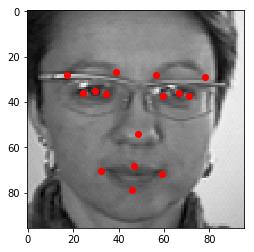

In [62]:
visualize(image,keypoints)

In [63]:
image_tensor=torch.from_numpy(image.reshape(-1,1,96,96)).float()

In [64]:
net.eval()
predicted_keypoints=net(image_tensor)

In [65]:
predicted_keypoints=predicted_keypoints*48+48

In [66]:
predicted_keypoints=predicted_keypoints.data.numpy()

In [67]:
predicted_keypoints.shape

(1, 30)

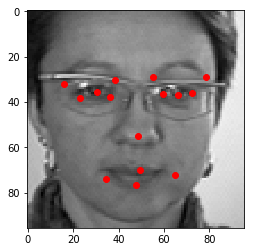

In [68]:
visualize(image,predicted_keypoints[0])

In [92]:
l1=net.conv1(image_tensor)

In [93]:
layer1_data=l1.data.numpy()

In [94]:
layer1_data.shape

(1, 32, 47, 47)

In [99]:
layer1_filter2=layer1_data[0][11]

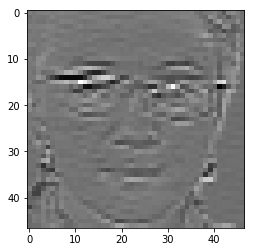

In [100]:
plt.imshow(layer1_filter2,cmap="gray")